# Target 

    We have alredy achived our goal, can we make it even better, at this time we will reduce paramters and try to achive 99.4 with the same techniques we applied previously 

# Result  

    The Target was alredy achived, we are also able to reduce the parameters and keep the same target accuracy 
    test_accuracy -> 99.45%
    train_accuracy -> 99.40%
    parameters -> 6,084

# Analysis  

    1. Since we achived our goal, the target was just to play around with the architecture and make the overall solution cheaper for deployment

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {"image_size":(28,28),
                         "random_rotation_angle":(-5.0, 5.0),
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,),
                         "center_crop_size": (24,24),
                         "center_crop_probability" : 0.1,
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


100%|██████████| 9912422/9912422 [00:00<00:00, 316492427.49it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24442230.39it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 175183428.66it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17024601.22it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



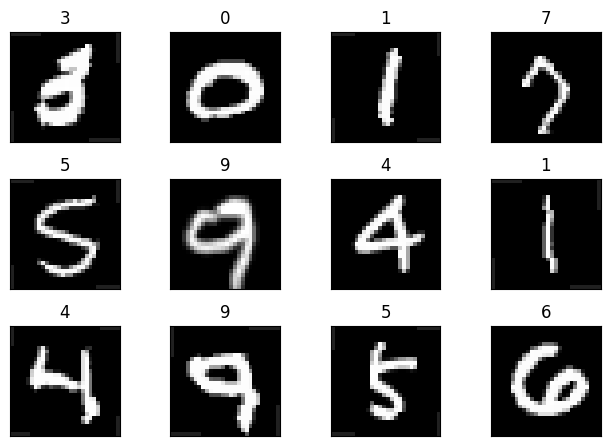

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "max_lr":0.017,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1209 Batch_id=937 Accuracy=92.49: 100%|██████████| 938/938 [00:51<00:00, 18.29it/s]


Test set: Average loss: 0.0539, Accuracy: 9832/10000 (98.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0055 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:54<00:00, 17.25it/s]


Test set: Average loss: 0.0412, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0153 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [00:53<00:00, 17.68it/s]


Test set: Average loss: 0.0349, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0680 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:56<00:00, 16.62it/s]


Test set: Average loss: 0.0292, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0078 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:53<00:00, 17.45it/s]


Test set: Average loss: 0.0234, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0152 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:53<00:00, 17.46it/s]


Test set: Average loss: 0.0274, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 7


Train: Loss=0.0047 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:53<00:00, 17.51it/s]


Test set: Average loss: 0.0226, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 8


Train: Loss=0.0099 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:52<00:00, 17.85it/s]


Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 9


Train: Loss=0.0011 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:54<00:00, 17.32it/s]


Test set: Average loss: 0.0212, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 10


Train: Loss=0.2137 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:56<00:00, 16.73it/s]


Test set: Average loss: 0.0202, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 11


Train: Loss=0.0166 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:53<00:00, 17.38it/s]


Test set: Average loss: 0.0205, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 12


Train: Loss=0.0061 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:54<00:00, 17.28it/s]


Test set: Average loss: 0.0201, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 13


Train: Loss=0.0158 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:52<00:00, 17.80it/s]


Test set: Average loss: 0.0193, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 14


Train: Loss=0.1063 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:52<00:00, 17.85it/s]


Test set: Average loss: 0.0194, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 15


Train: Loss=0.0379 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:52<00:00, 17.84it/s]


Test set: Average loss: 0.0203, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 9.0000e-04.


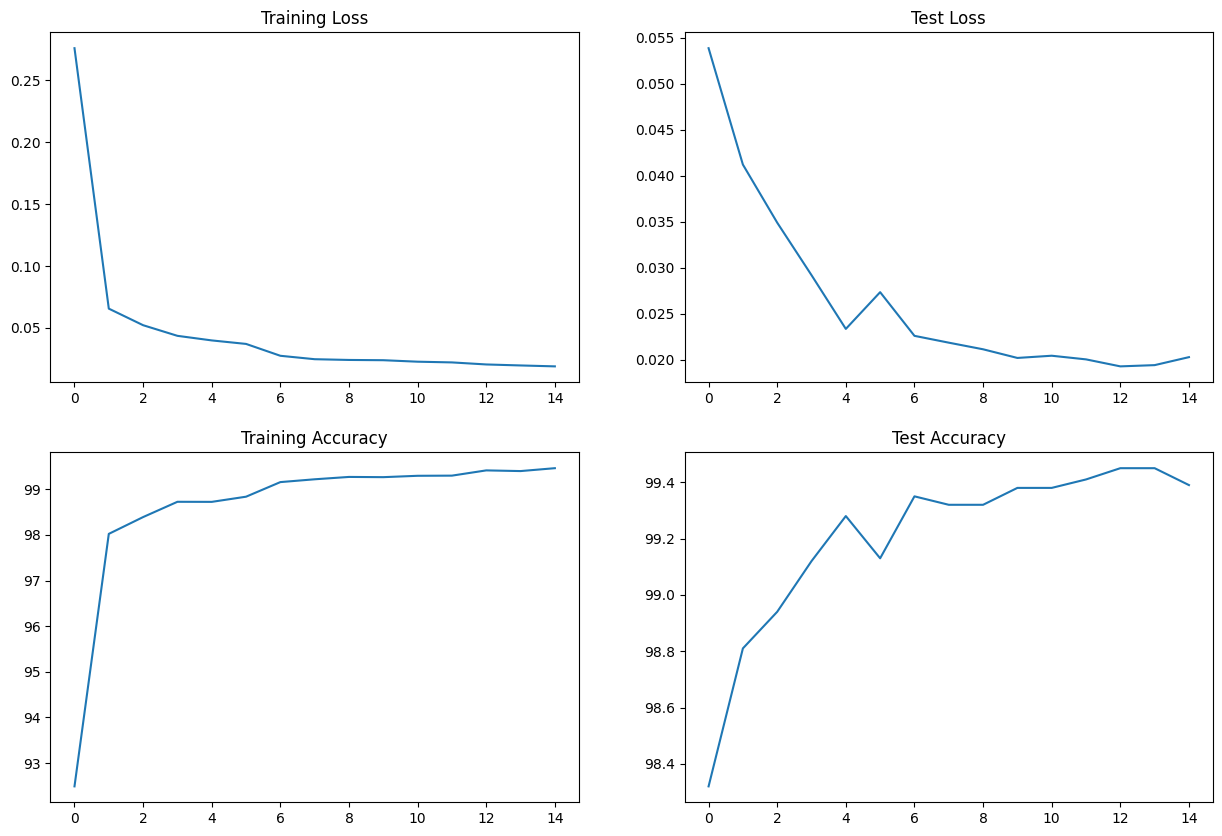

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

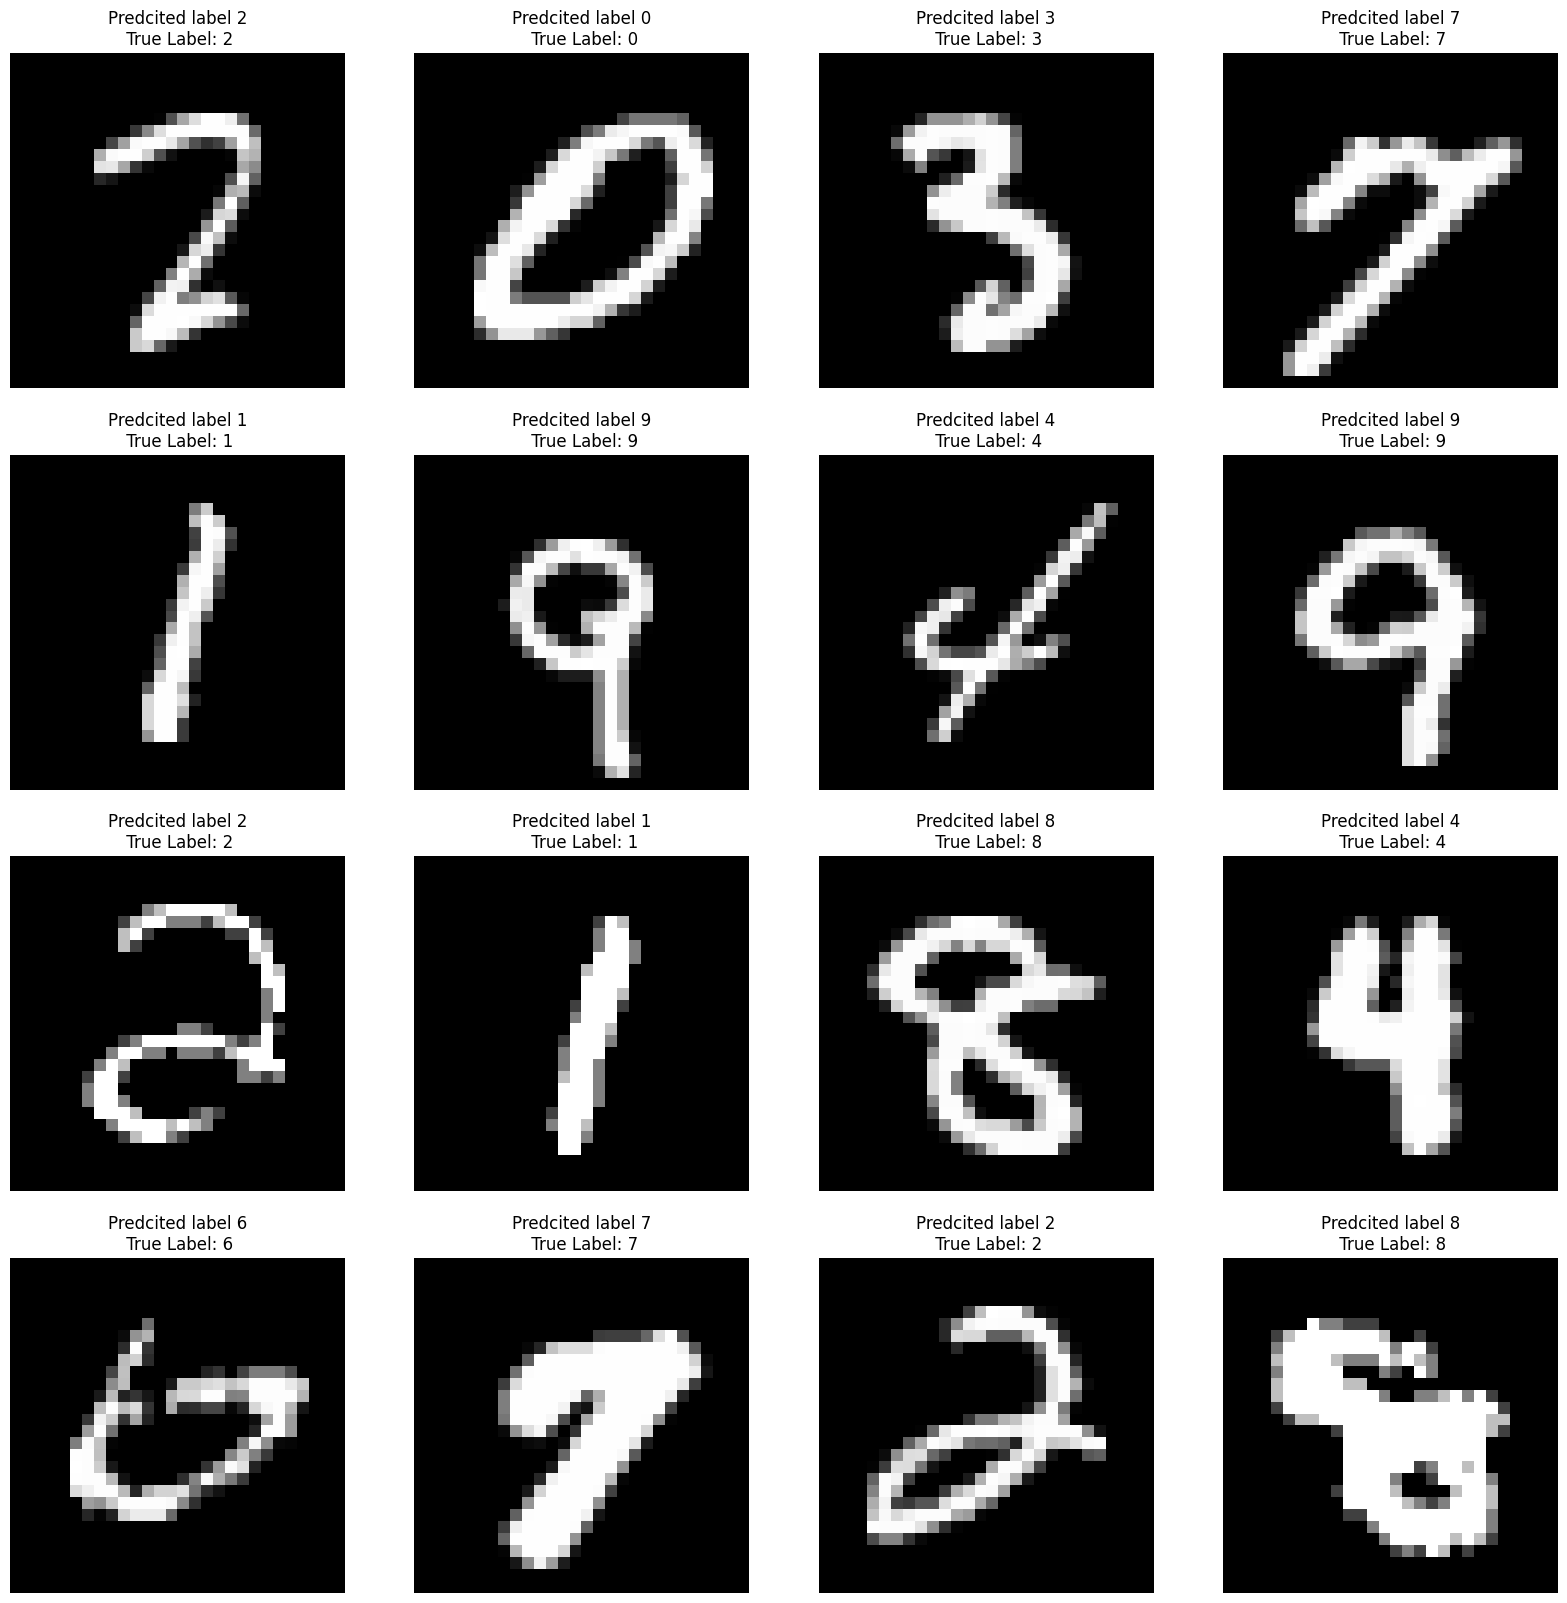

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

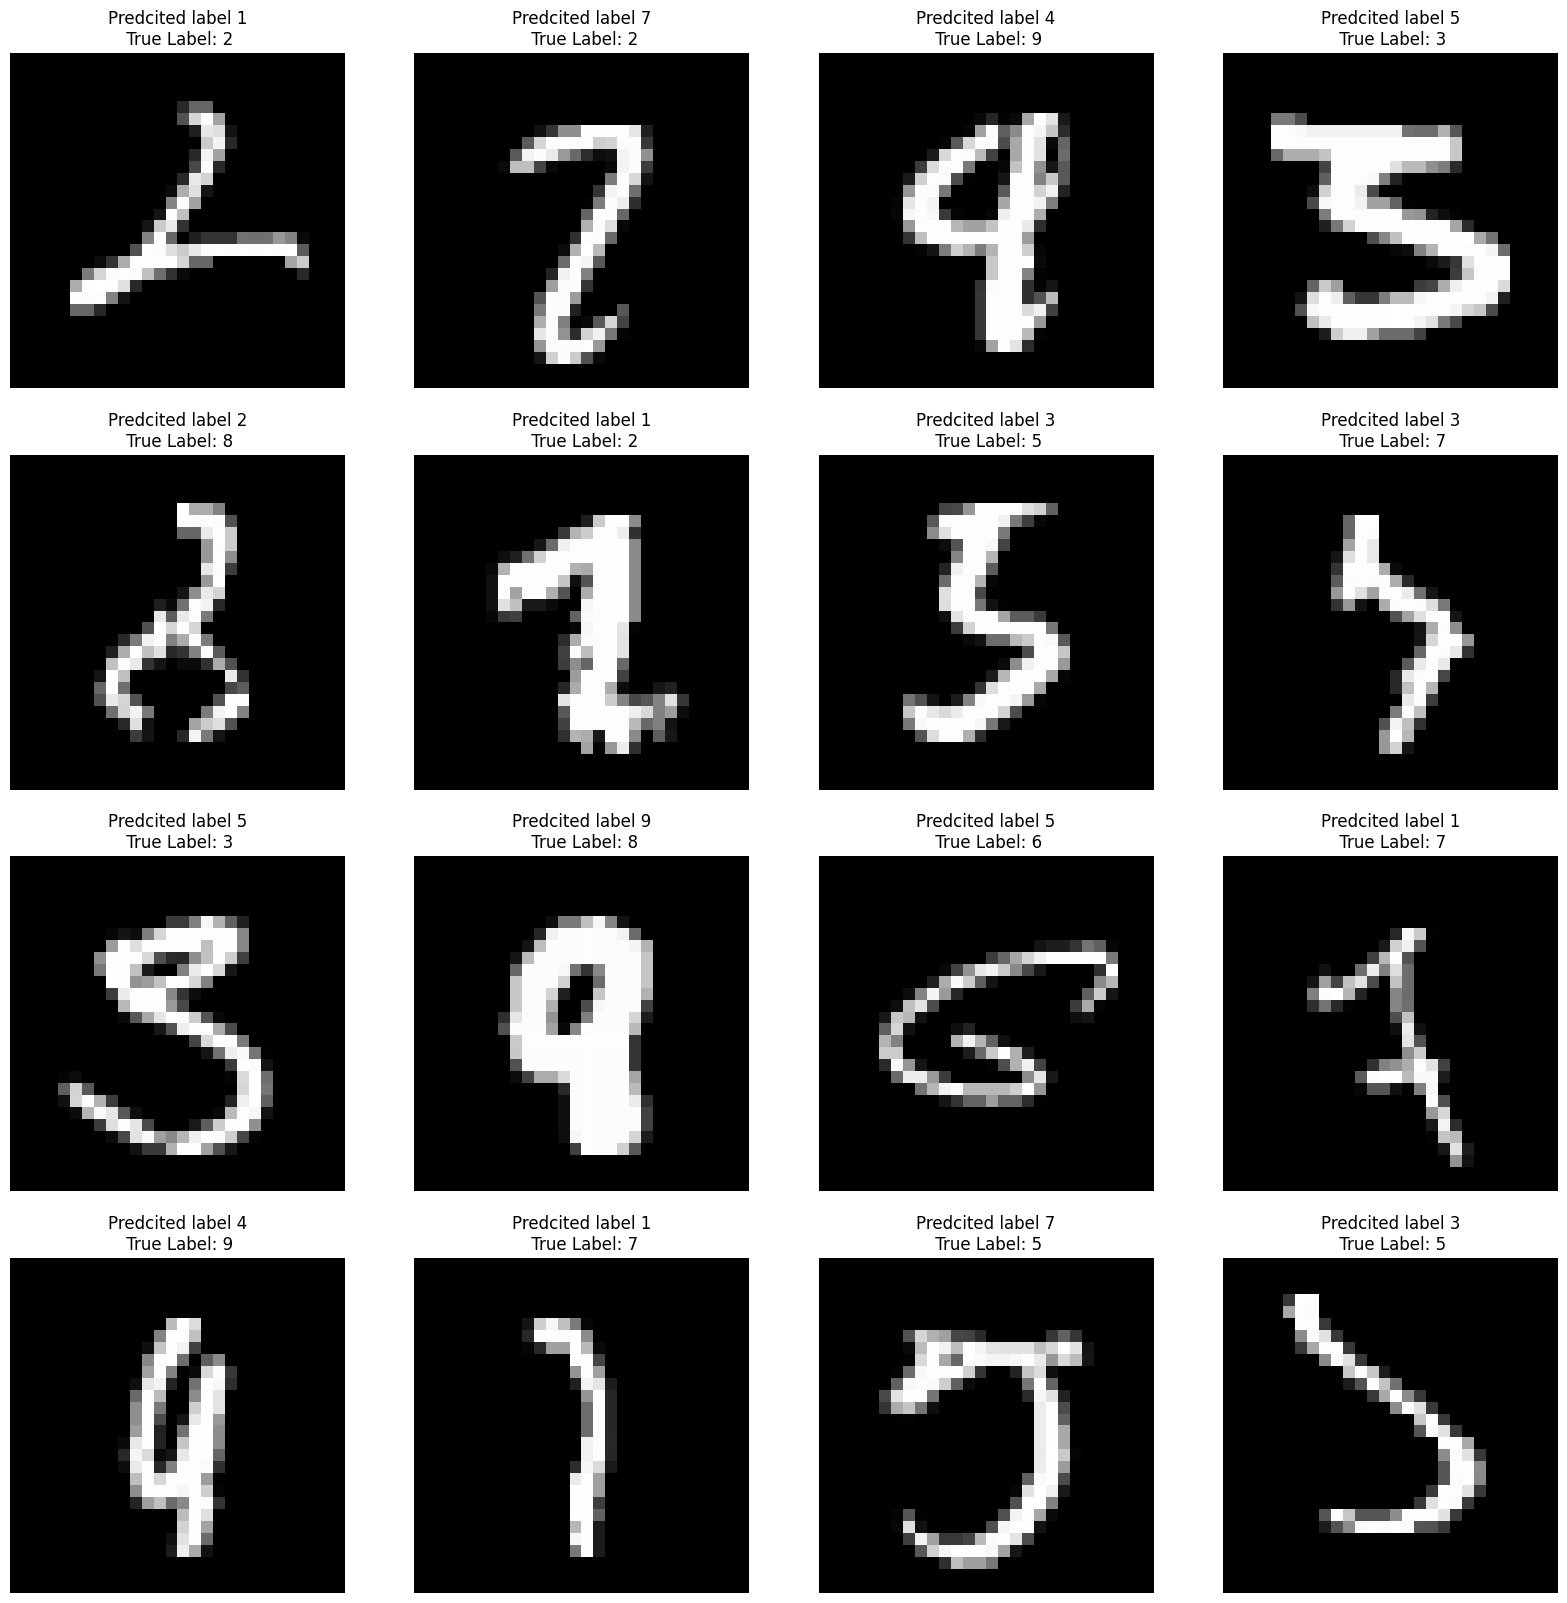

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 99 %
Accuracy of 1 - one : 99 %
Accuracy of 2 - two : 98 %
Accuracy of 3 - three : 99 %
Accuracy of 4 - four : 100 %
Accuracy of 5 - five : 100 %
Accuracy of 6 - six : 100 %
Accuracy of 7 - seven : 99 %
Accuracy of 8 - eight : 100 %
Accuracy of 9 - nine : 100 %


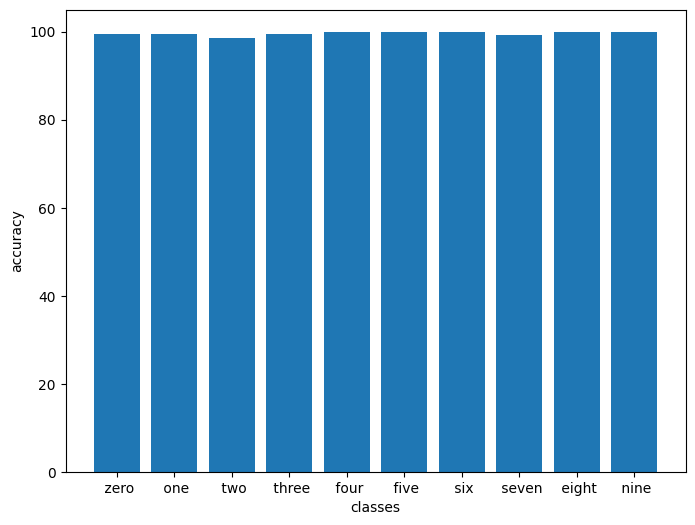

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)